## Steps to follow:

1. Import the data
2. Explore the data and identify things that would be worth exploring
    -Relationship between lunch and test scores
    -Relationship between parental ed and test score
3. Write two functions to make two different kinds of plots using matplotlib and seaborn (one each)
4. It might be a good idea to look at one of the categorical variables (gender, race/ethinicity) and the test scores 
5. Push your work back and send me a link to the repo!

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [18]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
df['overall_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
#simple average score
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


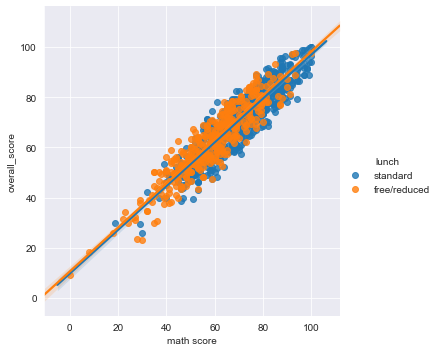

In [20]:
sns.lmplot(data = df, x='math score', y='overall_score', hue='lunch');
#If you focus on that upper quadrant, it appears that students recieving the free/reduced lunch
#aren't reaching perfect scores.

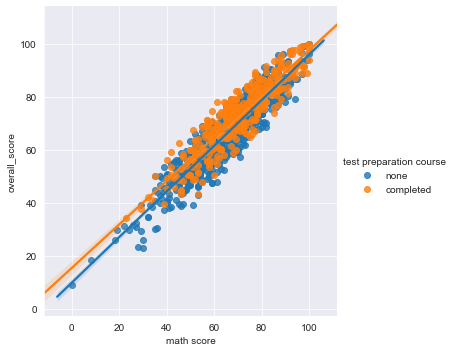

In [21]:
sns.lmplot(data = df, x='math score', y='overall_score', hue='test preparation course');
#Probably a good idea to do the prep course.

In [22]:
# Perform an Exploration of Math Score
df.corr()['overall_score'].sort_values(ascending=False)
# Idea - assign values to parental education level, then see correlation and plot it out
# Reading score has hightest correlation, math has the lowest.

overall_score    1.000000
reading score    0.970331
writing score    0.965667
math score       0.918746
Name: overall_score, dtype: float64

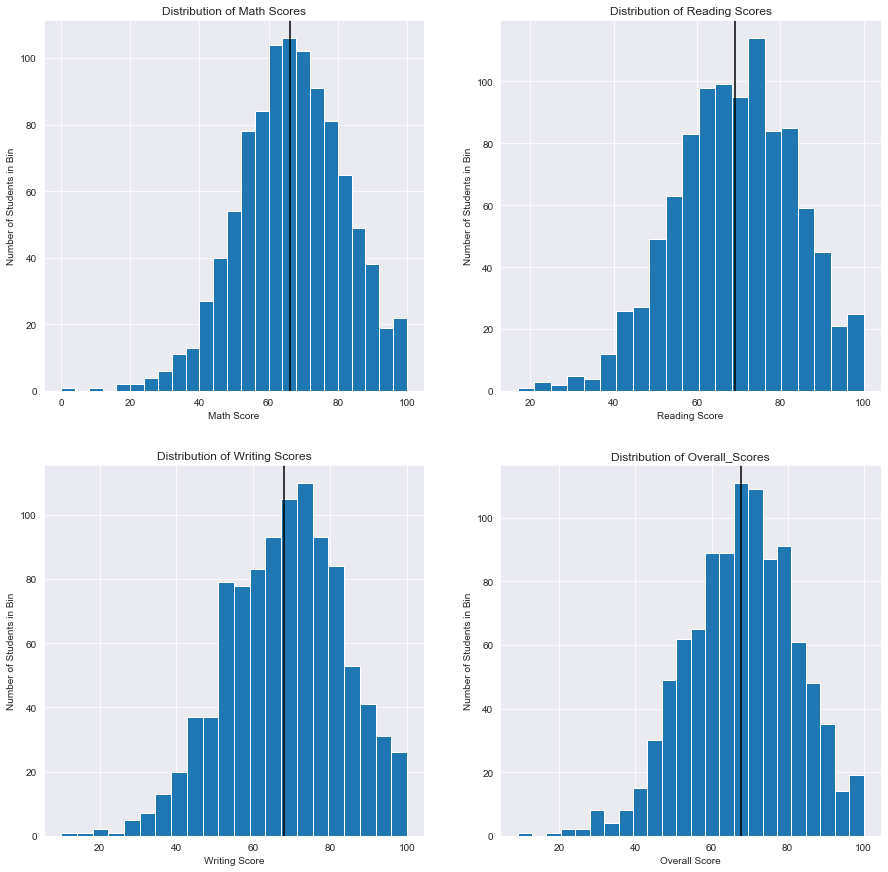

In [23]:
new_figure = plt.figure(figsize=(15,15))

ax = new_figure.add_subplot(221)
ax2 = new_figure.add_subplot(222)
ax3 = new_figure.add_subplot(223)
ax4 = new_figure.add_subplot(224)

ax.hist(df['math score'], bins='auto')
ax.set_title('Distribution of Math Scores')
ax.set_xlabel('Math Score')
ax.set_ylabel('Number of Students in Bin')
ax.axvline(df['math score'].mean(), color='black');

ax2.hist(df['reading score'], bins='auto')
ax2.set_title('Distribution of Reading Scores')
ax2.set_xlabel('Reading Score')
ax2.set_ylabel('Number of Students in Bin')
ax2.axvline(df['reading score'].mean(), color='black');

ax3.hist(df['writing score'], bins='auto')
ax3.set_title('Distribution of Writing Scores')
ax3.set_xlabel('Writing Score')
ax3.set_ylabel('Number of Students in Bin')
ax3.axvline(df['writing score'].mean(), color='black');

ax4.hist(df['overall_score'], bins='auto')
ax4.set_title('Distribution of Overall_Scores')
ax4.set_xlabel('Overall Score')
ax4.set_ylabel('Number of Students in Bin')
ax4.axvline(df['overall_score'].mean(), color='black');


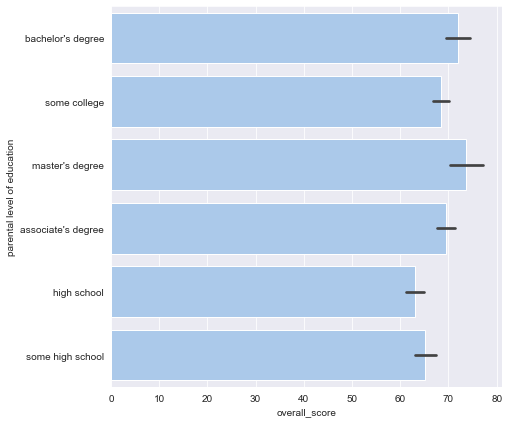

In [29]:
f, ax = plt.subplots(figsize=(7,7))
sns.set_color_codes("pastel")
sns.barplot(x="overall_score", y="parental level of education", data=df, color = 'b');

In [53]:

df['ed_level'] = df['parental level of education'].map(lambda x: 1 if x == 'some high school' 
                                                       else (2 if x == 'high school' 
                                                             else (3 if x == 'some college'
                                                                  else (4 if x == "associate's degree"
                                                                       else(5 if x == "bachelor's degree"
                                                                           else (6))))))
                                                      
                                                       
df.head()
#success!



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall_score,ed_level
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,5
1,female,group C,some college,standard,completed,69,90,88,82.333333,3
2,female,group B,master's degree,standard,none,90,95,93,92.666667,6
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,4
4,male,group C,some college,standard,none,76,78,75,76.333333,3


In [54]:
# Running the correlation again.  Going to see how parental ed level factors in.  
# Maybe make a nice graph too, then call it.
df.corr()['overall_score'].sort_values(ascending=False)
# On first glance, doesn't appear to be very correlated at all. . .  

overall_score    1.000000
reading score    0.970331
writing score    0.965667
math score       0.918746
ed_level         0.205785
Name: overall_score, dtype: float64

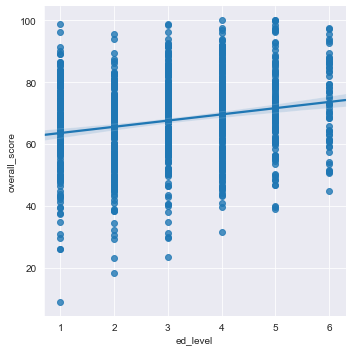

In [71]:
sns.lmplot(data = df, x='ed_level', y='overall_score');
# Looks like there's something here. . . 

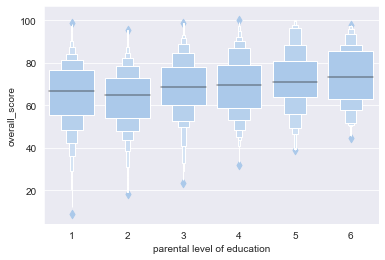

In [67]:
fig3 = sns.boxenplot(x='ed_level', y = 'overall_score', data = df, color = 'b')
fig3.set_xlabel('parental level of education');

In [76]:
df.groupby(['parental level of education', 'gender']).mean().head(12)

math score  reading score  writing score  \
parental level of education gender                                             
associate's degree          female   65.250000      74.120690      74.000000   
                            male     70.764151      67.433962      65.405660   
bachelor's degree           female   68.349206      77.285714      78.380952   
                            male     70.581818      68.090909      67.654545   
high school                 female   59.351064      68.202128      66.691489   
                            male     64.705882      61.480392      58.539216   
master's degree             female   66.500000      76.805556      77.638889   
                            male     74.826087      73.130435      72.608696   
some college                female   65.406780      73.550847      74.050847   
                            male     69.009259      64.990741      63.148148   
some high school            female   59.296703      69.109890      68.285714   
                            male     67.840909      64.693182      61.375000   

                                    overall_score  ed_level  
parental level of education gender                           
associate's degree          female      71.123563       4.0  
                            male        67.867925       4.0  
bachelor's degree           female      74.671958       5.0  
                            male        68.775758       5.0  
high school                 female      64.748227       2.0  
                            male        61.575163       2.0  
master's degree             female      73.648148       6.0  
                            male        73.521739       6.0  
some college                female      71.002825       3.0  
                            male        65.716049       3.0  
some high school            female      65.564103       1.0  
                            male        64.636364       1.0

In [77]:
df.isna().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
overall_score                  False
ed_level                       False
dtype: bool

In [78]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
overall_score                  0
ed_level                       0
dtype: int64

In [79]:
for col in ['parental level of education', 'lunch', 'race/ethnicity']:
    print(f"Values for {col}:\n{df[col].unique()}\n\n")

Values for parental level of education:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Values for lunch:
['standard' 'free/reduced']


Values for race/ethnicity:
['group B' 'group C' 'group A' 'group D' 'group E']




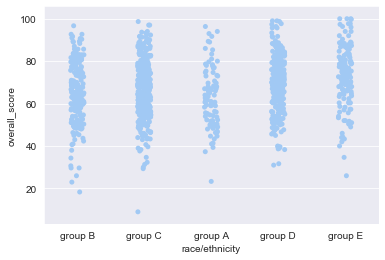

In [85]:
sns.stripplot(data = df, x='race/ethnicity', y='overall_score', color = 'b');


In [89]:
df.describe()

,math score,reading score,writing score,overall_score,ed_level
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667,3.081000
std,15.16308,14.600192,15.195657,14.257326,1.460333
min,0.00000,17.000000,10.000000,9.000000,1.000000
25%,57.00000,59.000000,57.750000,58.333333,2.000000
50%,66.00000,70.000000,69.000000,68.333333,3.000000
75%,77.00000,79.000000,79.000000,77.666667,4.000000
max,100.00000,100.000000,100.000000,100.000000,6.000000


In [90]:
df['math score'].median()

66.0

In [91]:
df.quantile(q = .9)
#90th percentile

math score       86.0
reading score    87.1
writing score    87.0
overall_score    86.0
ed_level          5.0
Name: 0.9, dtype: float64